In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import warnings

# Load the dataset
file_path = '/Users/paramanandbhat/Downloads/energy consumption 2.csv'
data = pd.read_csv(file_path)


In [4]:

# Convert 'DATE' column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%m/%Y')

# Splitting the dataset into training and test data
# Typically, a common split ratio is 80% for training and 20% for testing.
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

train_data = train_data.copy()
test_data = test_data.copy()

print(train_data.head(), test_data.head())


        DATE  ENERGY_INDEX
0 1939-01-01        3.3842
1 1939-02-01        3.4100
2 1939-03-01        3.4875
3 1939-04-01        3.5133
4 1939-05-01        3.5133           DATE  ENERGY_INDEX
775 2003-08-01      104.7716
776 2003-09-01       93.1841
777 2003-10-01       86.7534
778 2003-11-01       88.8280
779 2003-12-01      103.8162


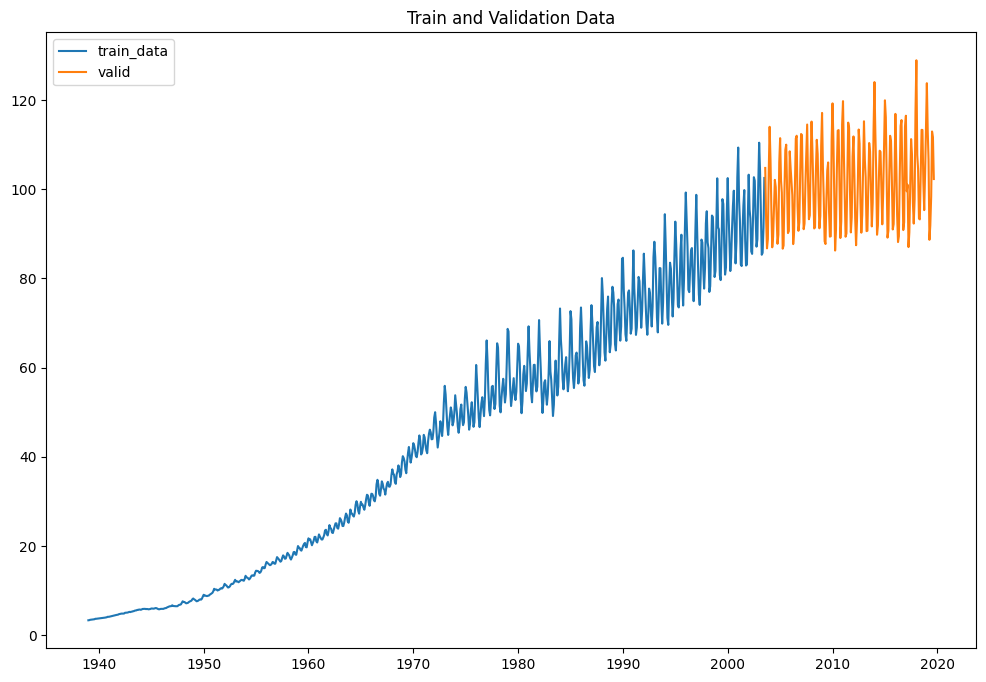

In [5]:

# Required Preprocessing 
train_data['timestamp'] = pd.to_datetime(train_data['DATE'], format='%Y-%m-%d')
train_data.index = train_data.timestamp

test_data['timestamp'] = pd.to_datetime(test_data['DATE'], format='%Y-%m-%d')
test_data.index = test_data.timestamp

plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(test_data.index,test_data['ENERGY_INDEX'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()


In [6]:
# Stationarity Test
# dickey fuller, KPSS
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

adf_test(train_data['ENERGY_INDEX'])    


Results of Dickey-Fuller Test:
Test Statistic                   1.589352
p-value                          0.997825
#Lags Used                      15.000000
Number of Observations Used    759.000000
Critical Value (1%)             -3.438995
Critical Value (5%)             -2.865355
Critical Value (10%)            -2.568802
dtype: float64


In [7]:
'''
Test Statistic : 1.589352
ritical Value (1%)             -3.438995
Critical Value (5%)             -2.865355
Critical Value (10%)            -2.568802

Test Statistic > Critical value
p-value                          0.997825
Value of p is also higher 
Series is non stationary.
'''


'\nTest Statistic : 1.589352\nritical Value (1%)             -3.438995\nCritical Value (5%)             -2.865355\nCritical Value (10%)            -2.568802\n\nTest Statistic > Critical value\np-value                          0.997825\nValue of p is also higher \nSeries is non stationary.\n'

In [8]:
#Verify series is non stationary using KPSS test

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)


kpss_test(train_data['ENERGY_INDEX'])


Results of KPSS Test:
Test Statistic            4.390342
p-value                   0.010000
Lags Used                17.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/var/folders/c7/xx2r_j1j5jnchz6414lhvm3h0000gn/T/ipykernel_50058/664442926.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [9]:
'''
If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary).  **Here test statistic is > than critical. Hence series is not stationary**

Alternatively, we can use the p-value to make the inference. If p-value is less than 0.05, we can reject the null hypothesis. And say that the series is not stationary.

'''

'\nIf the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary).  **Here test statistic is > than critical. Hence series is not stationary**\n\nAlternatively, we can use the p-value to make the inference. If p-value is less than 0.05, we can reject the null hypothesis. And say that the series is not stationary.\n\n'

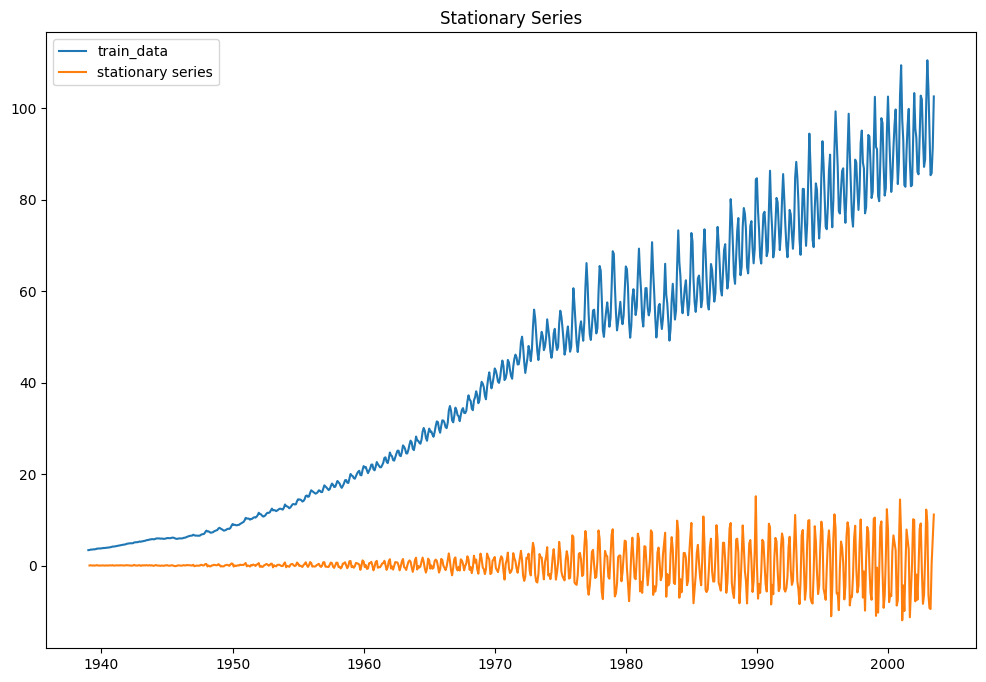

In [10]:
# Making Series Stationary

train_data['ENERGY_INDEX_DIFF'] = train_data['ENERGY_INDEX'] - train_data['ENERGY_INDEX'].shift(1)

plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(train_data.index,train_data['ENERGY_INDEX_DIFF'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()


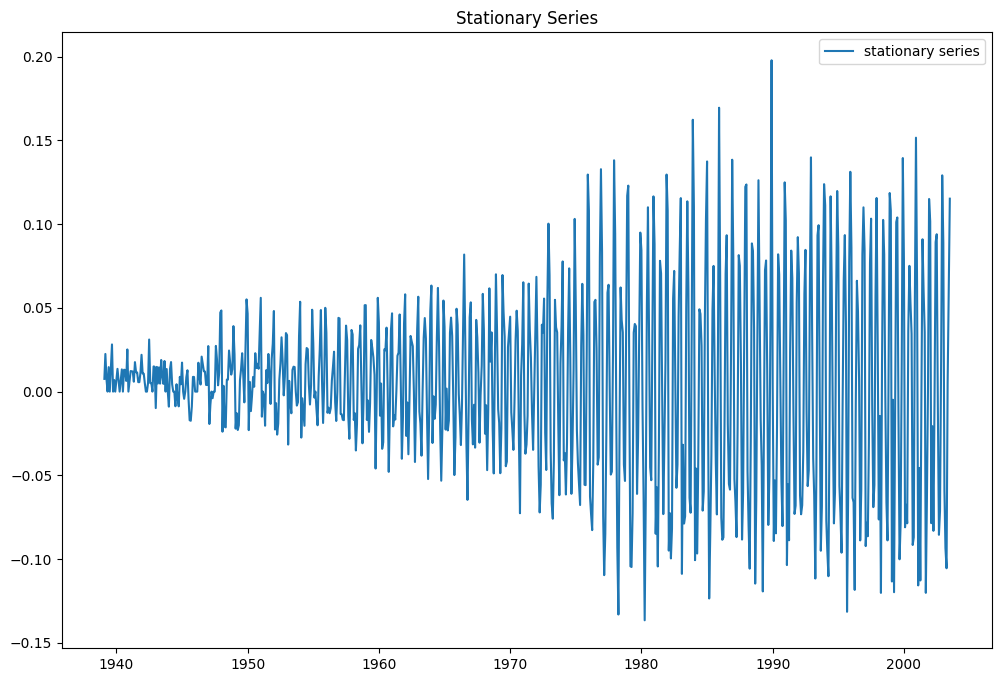

In [11]:
train_data['ENERGY_INDEX_LOG'] = np.log(train_data['ENERGY_INDEX'])
train_data['ENERGY_INDEX_LOG_DIFF'] = train_data['ENERGY_INDEX_LOG'] - train_data['ENERGY_INDEX_LOG'].shift(1)

plt.figure(figsize=(12,8))
plt.plot(train_data.index,train_data['ENERGY_INDEX_LOG_DIFF'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()


Results of Dickey-Fuller Test:
Test Statistic                  -5.318775
p-value                          0.000005
#Lags Used                      21.000000
Number of Observations Used    752.000000
Critical Value (1%)             -3.439076
Critical Value (5%)             -2.865391
Critical Value (10%)            -2.568821
dtype: float64
Results of KPSS Test:
Test Statistic            0.791973
p-value                   0.010000
Lags Used                37.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/var/folders/c7/xx2r_j1j5jnchz6414lhvm3h0000gn/T/ipykernel_50058/664442926.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


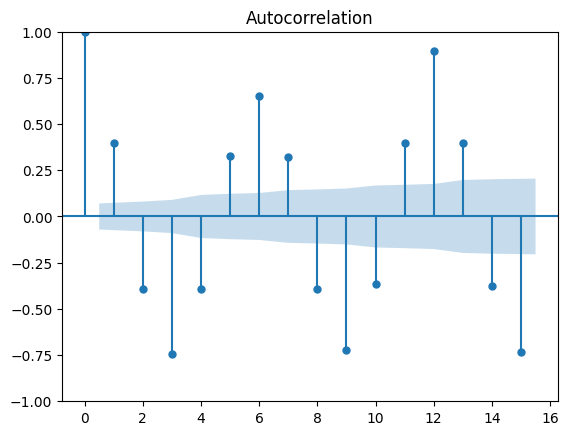

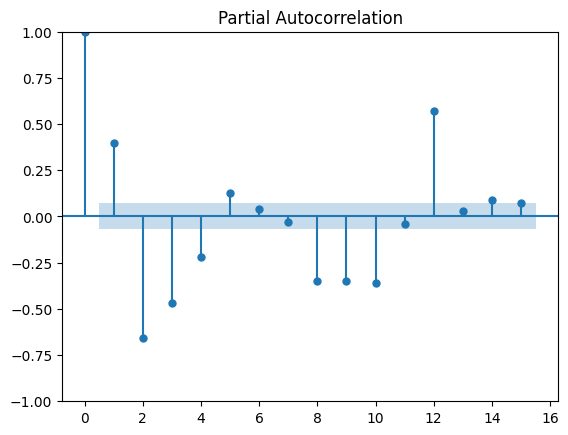

In [12]:
adf_test(train_data['ENERGY_INDEX_LOG_DIFF'].dropna())

kpss_test(train_data['ENERGY_INDEX_LOG_DIFF'].dropna())

# ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train_data['ENERGY_INDEX_LOG_DIFF'].dropna(), lags=15)
plot_pacf(train_data['ENERGY_INDEX_LOG_DIFF'].dropna(), lags=15)
plt.show()


In [13]:
# Preprocessing for SARIMA model
train_data['DATE'] = pd.to_datetime(train_data['DATE'], format='%Y-%m-%d')
train_data.set_index('DATE', inplace=True)


In [15]:
'''For SARIMA model,We see p =1 and q =1 from ACF and PACF' Seasonal is 12 as it is in months'''

"We see p =1 and q =1 from ACF and PACF' Seasonal is 12 as it is in months"

In [25]:
# Forecast 36 months ahead from the end of the dataset
last_date = train_data.index[-1]
# Fit the model to the valid dataset
full_model = SARIMAX(data['ENERGY_INDEX'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
full_model_fit = full_model.fit(disp=False)

forecast_full = full_model_fit.forecast(steps=36)


/Users/paramanandbhat/Projects/Param_learn/ML/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/paramanandbhat/Projects/Param_learn/ML/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [26]:

# Adding forecast dates to the forecast series
forecast_dates_full = pd.date_range(start=last_date, periods=36, freq='M') # Assuming monthly frequency
forecast_full.index = forecast_dates_full


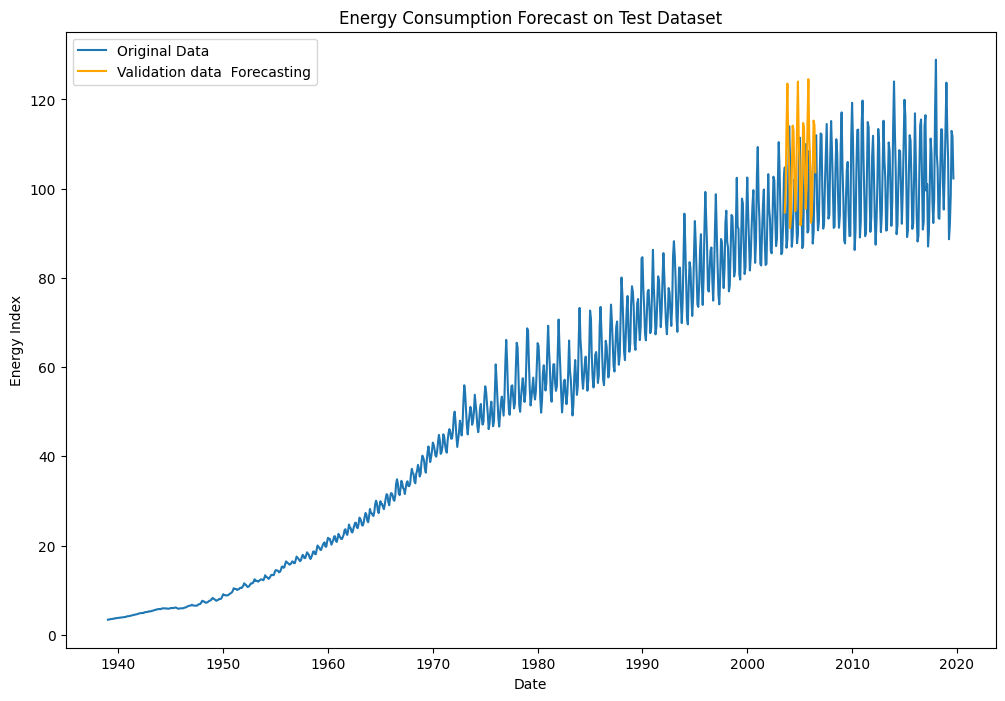

In [27]:
# Plotting the original series and validation forecast
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['ENERGY_INDEX'], label='Original Data')
plt.plot(forecast_full.index, forecast_full, label='Validation data  Forecasting', color='orange')
plt.title('Energy Consumption Forecast on Test Dataset')
plt.xlabel('Date')
plt.ylabel('Energy Index')
plt.legend()
plt.show()


/Users/paramanandbhat/Projects/Param_learn/ML/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/paramanandbhat/Projects/Param_learn/ML/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


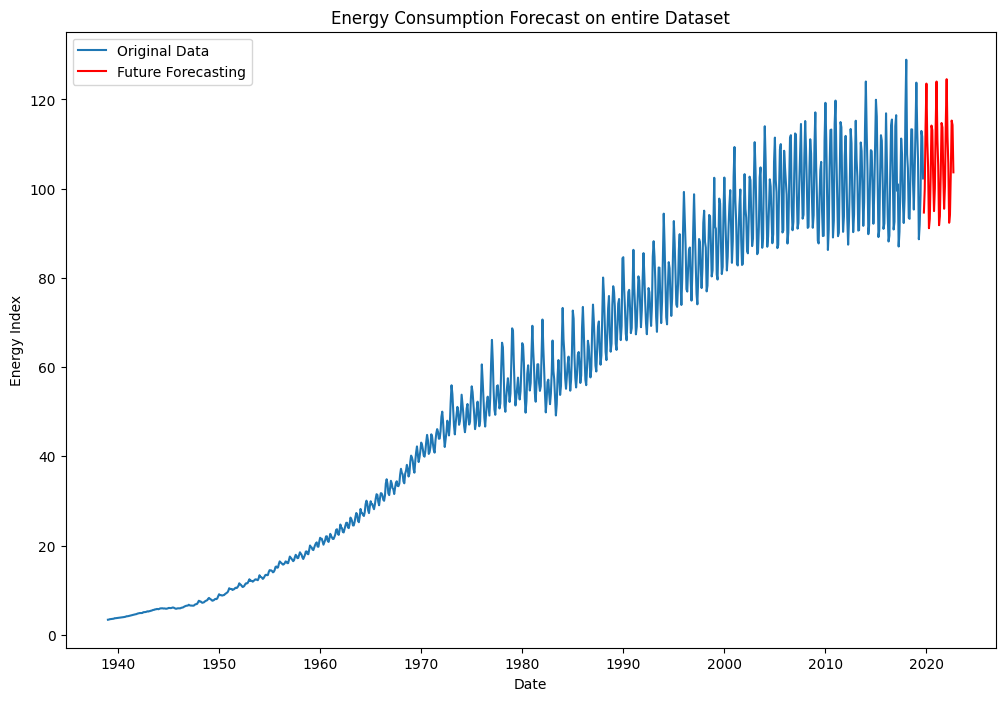

In [28]:
# Forecast 36 months ahead from the end of the dataset
last_date = data.index[-1]
# Fit the model to the valid dataset
full_model = SARIMAX(data['ENERGY_INDEX'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
full_model_fit = full_model.fit(disp=False)

forecast_full = full_model_fit.forecast(steps=36)

# Adding forecast dates to the forecast series
forecast_dates_full = pd.date_range(start=last_date, periods=36, freq='M') # Assuming monthly frequency
forecast_full.index = forecast_dates_full

# Plotting the original series and full forecast
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['ENERGY_INDEX'], label='Original Data')
plt.plot(forecast_full.index, forecast_full, label='Future Forecasting', color='red')
plt.title('Energy Consumption Forecast on entire Dataset')
plt.xlabel('Date')
plt.ylabel('Energy Index')
plt.legend()
plt.show()
